In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

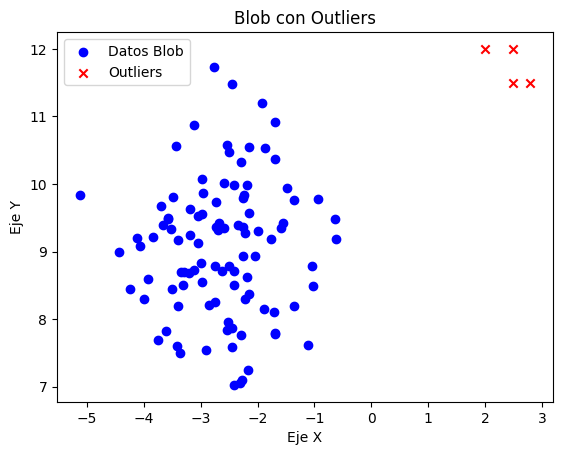

In [42]:

# Crear datos tipo blob con una sola clase
X, _ = make_blobs(n_samples=100, centers=1, cluster_std=1.0, random_state=42)

# Agregar tres outliers manualmente
outliers = np.array([[2, 12], [2.5, 12], [2.5, 11.5], [2.8, 11.5]])
X_with_outliers = np.vstack([X, outliers])

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Datos Blob')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', marker='x')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Blob con Outliers')
plt.legend()
plt.show()

In [43]:
df = pd.DataFrame(X_with_outliers, columns=['VAR1', 'VAR2'])
model = NearestNeighbors(n_neighbors=10)
model.fit(df)     

NearestNeighbors(n_neighbors=10)

In [44]:
distances, index = model.kneighbors(df, n_neighbors=10, return_distance=True)


In [46]:
distances.mean(axis=1).max()

2.7641672938107957

In [47]:
df["health_score"] = distances.mean(axis=1).max() - distances.mean(axis=1)

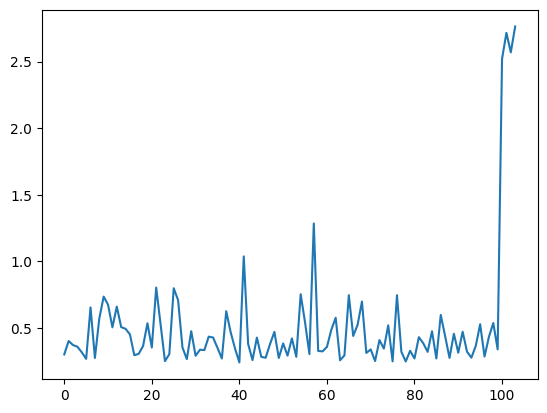

In [50]:
plt.plot(distances.mean(axis=1))

In [51]:
df["anomaly"] = df["health_score"] < 1.5  


In [56]:
df.loc[df["anomaly"] == True, "VAR1"]

57    -5.128943
100    2.000000
101    2.500000
102    2.500000
103    2.800000
Name: VAR1, dtype: float64

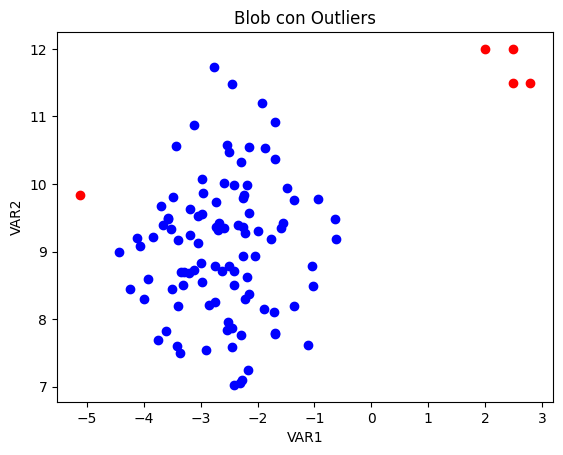

In [57]:

plt.scatter(df.loc[df["anomaly"] == True, "VAR1"], df.loc[df["anomaly"] == True, "VAR2"], c='r', cmap='coolwarm')
plt.scatter(df.loc[df["anomaly"] == False, "VAR1"], df.loc[df["anomaly"] == False, "VAR2"], c='b', cmap='coolwarm')


plt.xlabel('VAR1')
plt.ylabel('VAR2')
plt.title('Blob con Outliers')
plt.show()